In [0]:
%cd
  
!git clone --quiet https://github.com/tensorflow/models.git


!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

%cd ~/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':'+os.path.abspath(os.curdir)+':'+os.path.abspath(os.curdir)+'/slim/'

import sys
sys.path.append('~/models/research/slim')
!python object_detection/builders/model_builder_test.py

/root
fatal: destination path 'models' already exists and is not an empty directory.
/root/models/research
W0724 11:30:34.545955 140602208487296 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0724 11:30:34.872180 140602208487296 deprecation_wrapper.py:119] From /root/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0724 11:30:34.885381 140602208487296 deprecation_wrapper.py:119] From /root/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

Running tests under Python 3.6.8: /usr/bin/python3


# New Section

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import os
import shutil
import glob
import urllib
import tarfile

MODEL = 'faster_rcnn_inception_v2_coco_2018_01_28'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tare = tarfile.open(MODEL_FILE)
tare.extractall()
tare.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

In [0]:
!rm -r chess
!mkdir chess
!cp "/content/drive/My Drive/modified_data/train.record" "/content/chess/train.record"
!cp "/content/drive/My Drive/modified_data/test.record" "/content/chess/test.record"
!cp  "/content/drive/My Drive/modified_data/label.pbtxt" "/content/chess/label_map.pbtxt"
!cp  "/content/drive/My Drive/modified_data/faster_rcnn_inception_v2_coco.config" "/content/faster_rcnn_inception_v2_coco.config"

In [0]:
!python /root/models/research/object_detection/legacy/train.py \
    --pipeline_config_path=/content/faster_rcnn_inception_v2_coco.config \
    --train_dir=/content/chess/trained \
    --alsologtostderr \
    

W0724 10:20:58.791095 140042034579328 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0724 10:20:59.364634 140042034579328 deprecation_wrapper.py:119] From /root/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0724 10:20:59.387717 140042034579328 deprecation_wrapper.py:119] From /root/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0724 10:20:59.433646 140042034579328 deprecation_wrapper.py:119] From /root/models/research/object_detection/legacy/train.py:55: The name tf.logging.set_verb

In [0]:
cd /content/

/content


In [0]:
!cd /content/
!python ~/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/content/faster_rcnn_inception_v2_coco.config\
    --trained_checkpoint_prefix=chess/trained/model.ckpt-1531 \
    --output_directory=fine_tuned_model 

W0724 11:46:08.539480 140263678027648 deprecation_wrapper.py:119] From /root/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0724 11:46:08.552061 140263678027648 deprecation_wrapper.py:119] From /root/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0724 11:46:08.565883 140263678027648 deprecation_wrapper.py:119] From /root/models/research/object_detection/export_inference_graph.py:162: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0724 11:46:08.566778 140263678027648 deprecation_wrapper.py:119] From /root/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0724 11:46:08.574901 140263678027648 deprecation_wrapper.py:119] From /root/models/research/object_detection/exporter.py:381: The name tf.gfil

In [0]:
!cp "/content/fine_tuned_model/frozen_inference_graph.pb" "/content/drive/My Drive/modified_data/frozen_inference_graph.pb"

/root/models/research/object_detection
['/content/drive/My Drive/modified_data/test/images/IMG_5353.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5308.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5303.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5288.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5293.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5283.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5278.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5263.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5268.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5273.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5258.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5298.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5233.JPG', '/content/drive/My Drive/modified_data/test/images/IMG_5223.JPG', '/content/drive/My Drive/modified_da

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: ignored

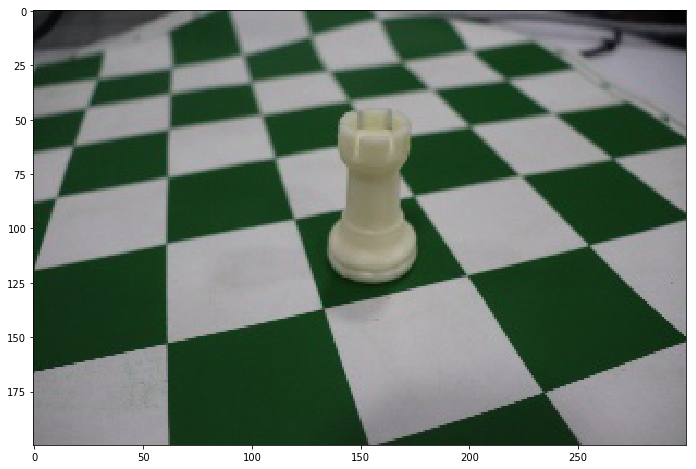

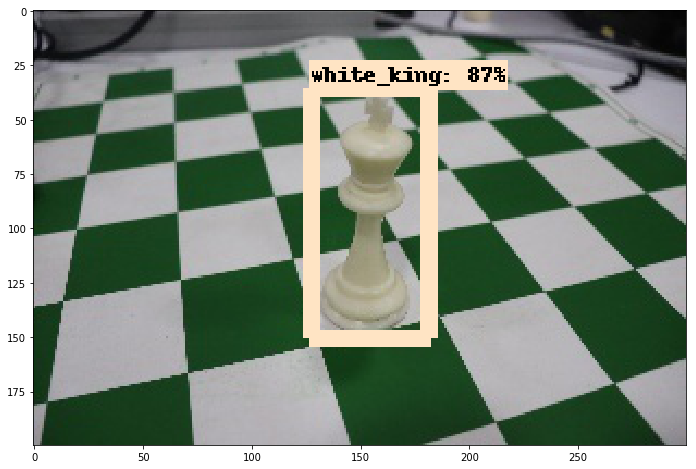

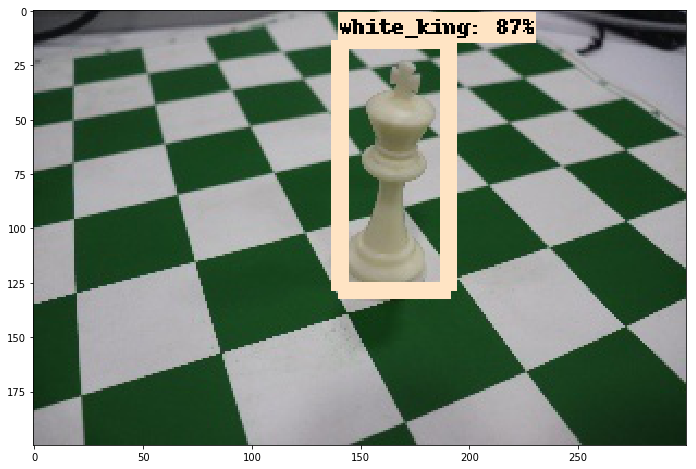

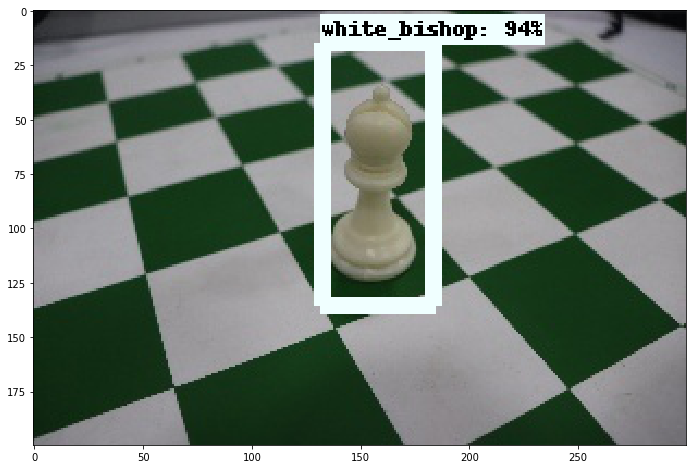

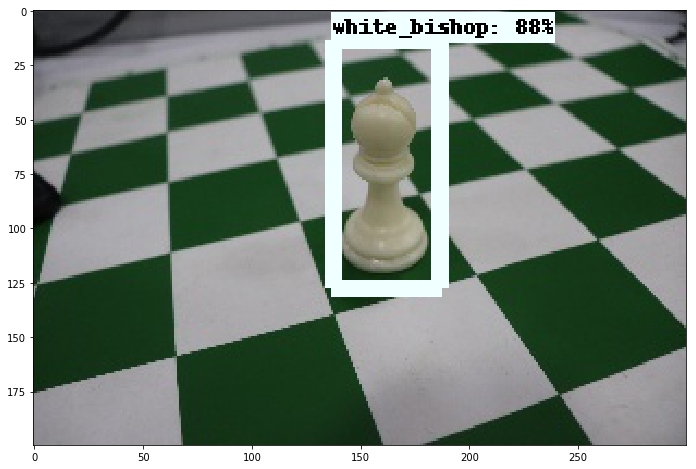

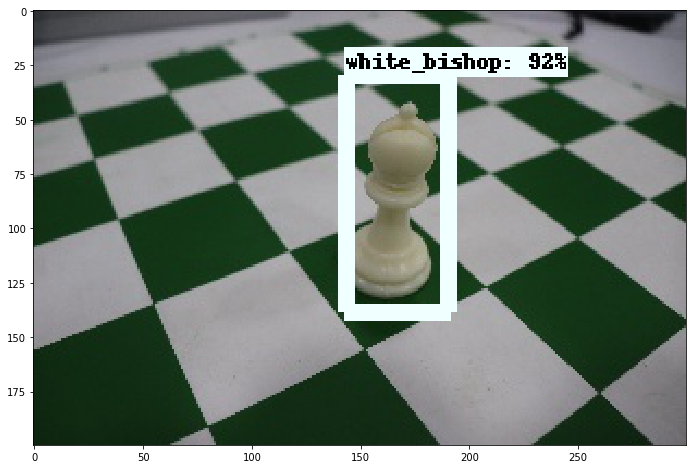

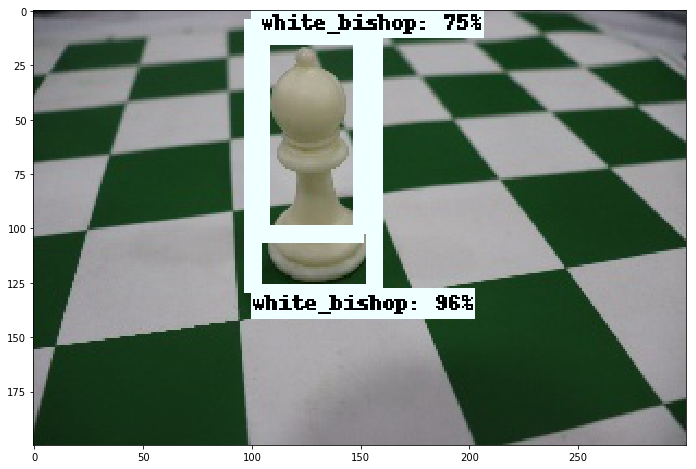

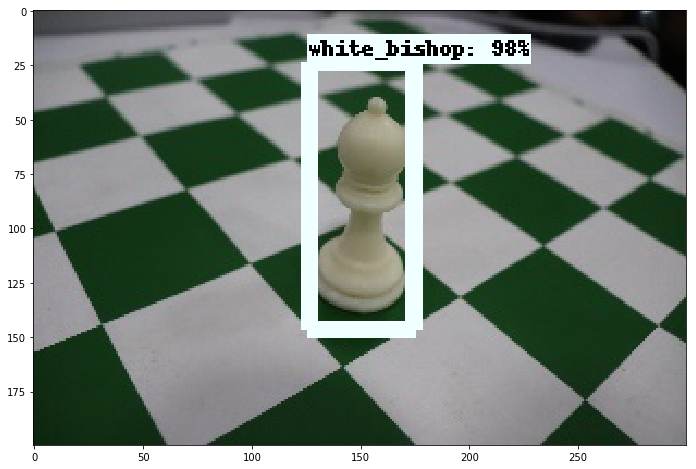

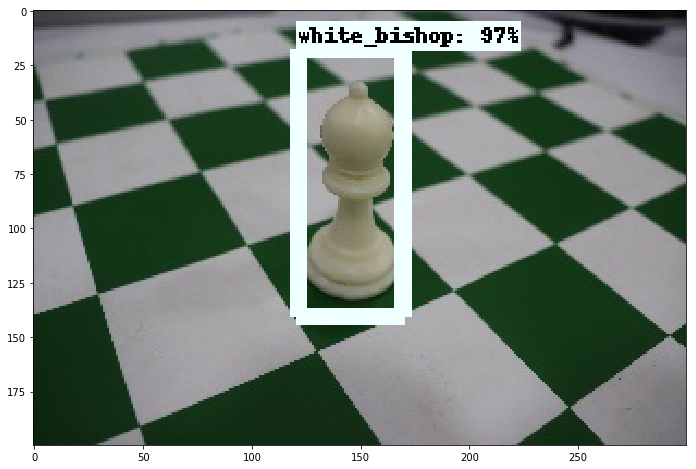

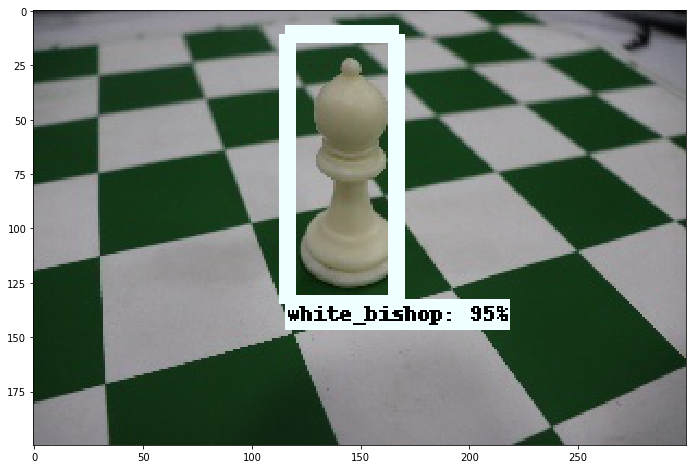

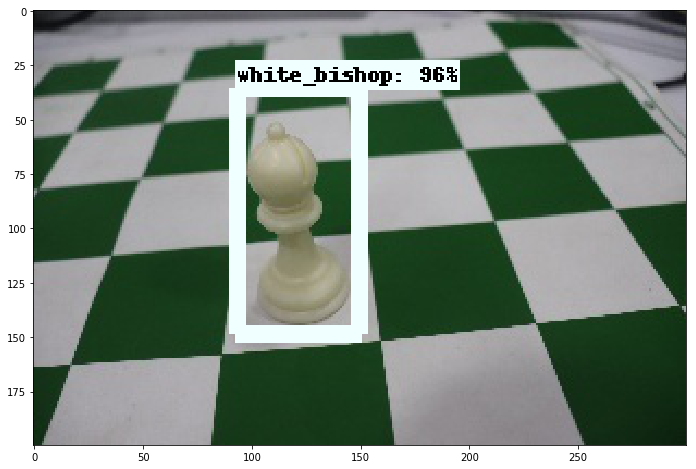

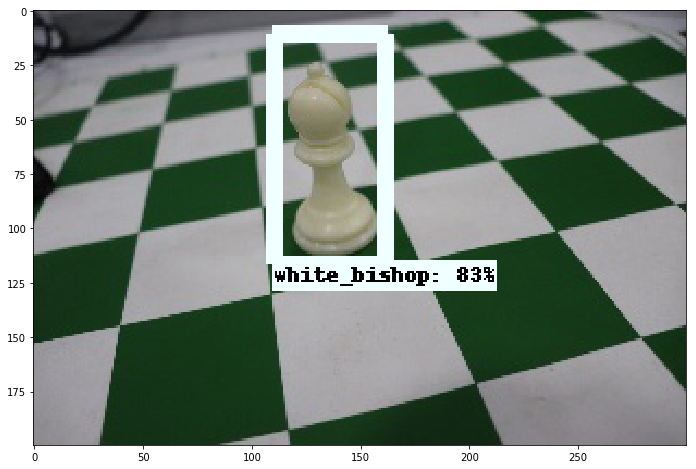

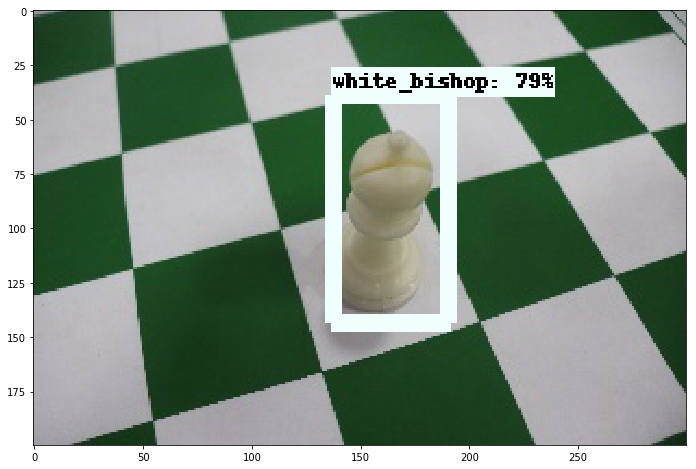

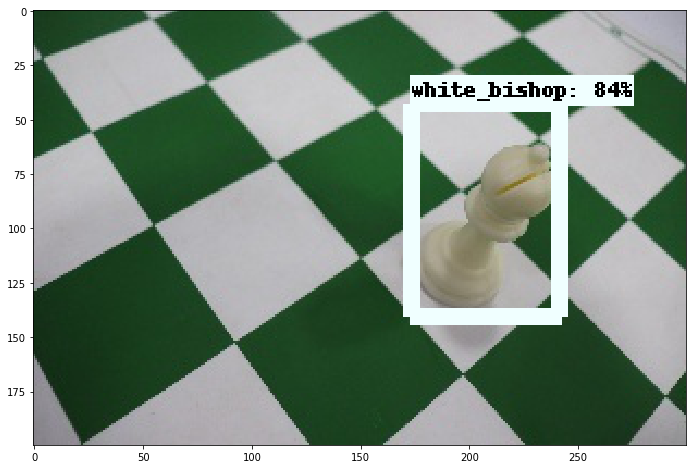

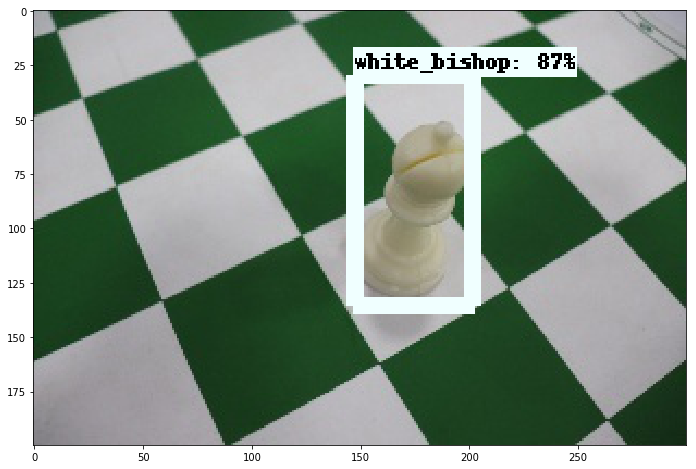

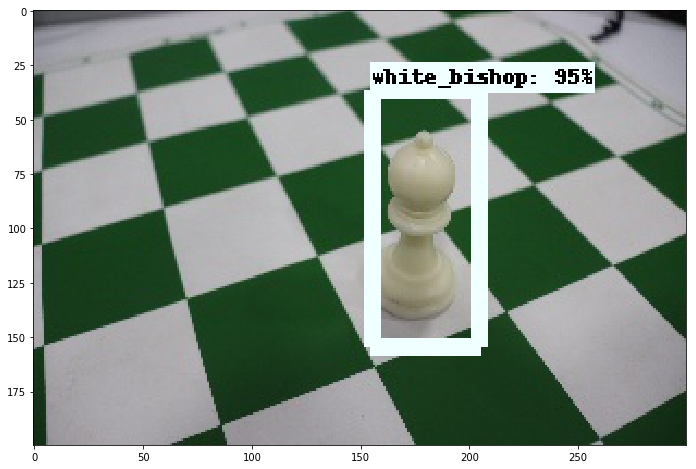

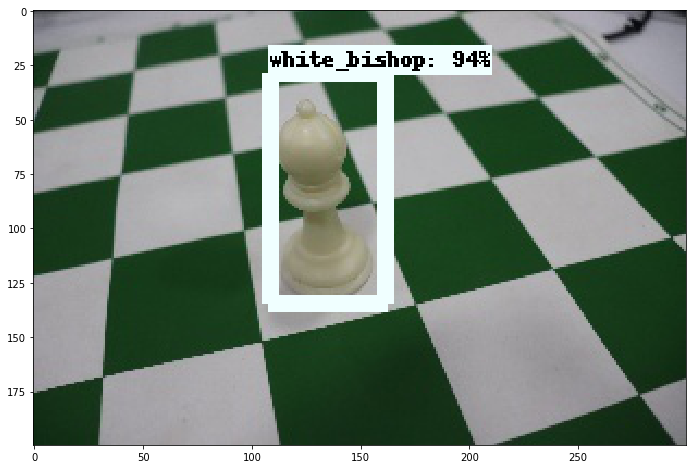

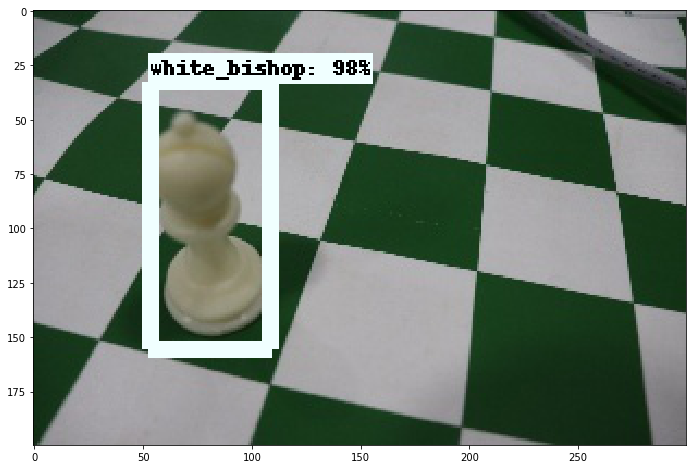

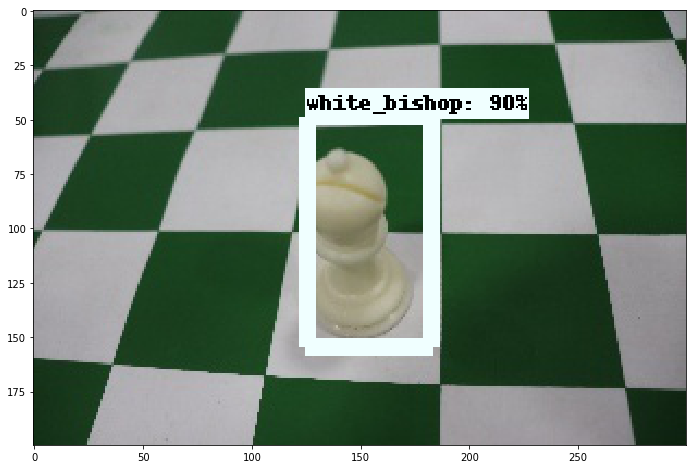

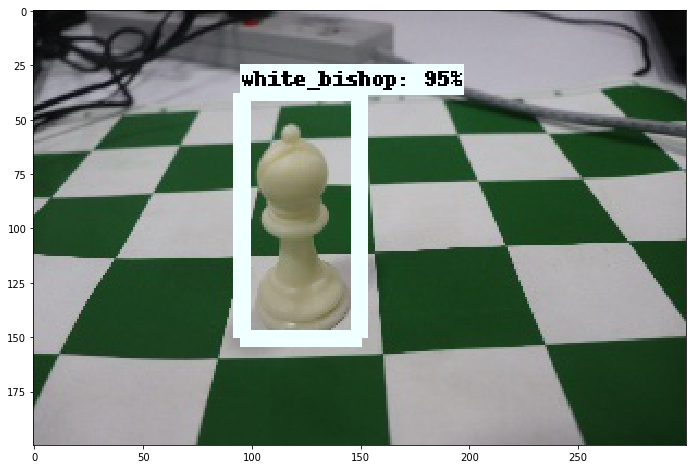

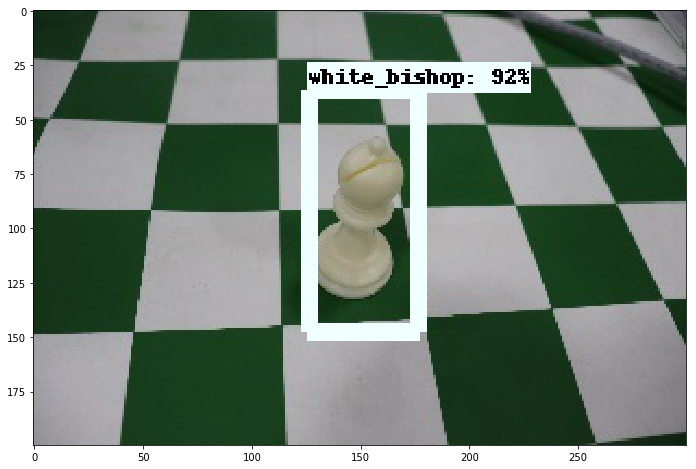

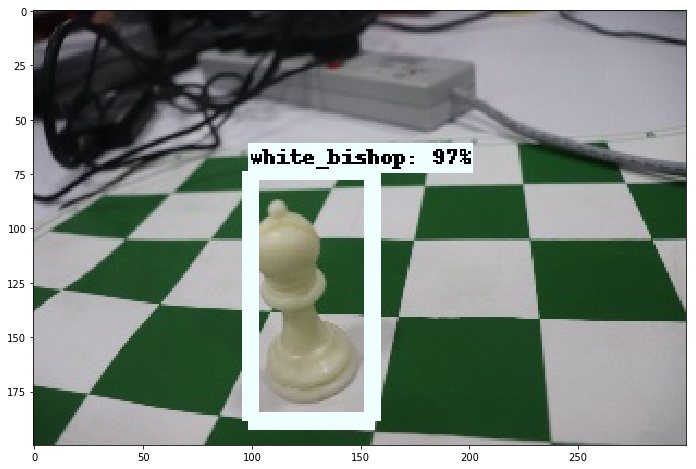

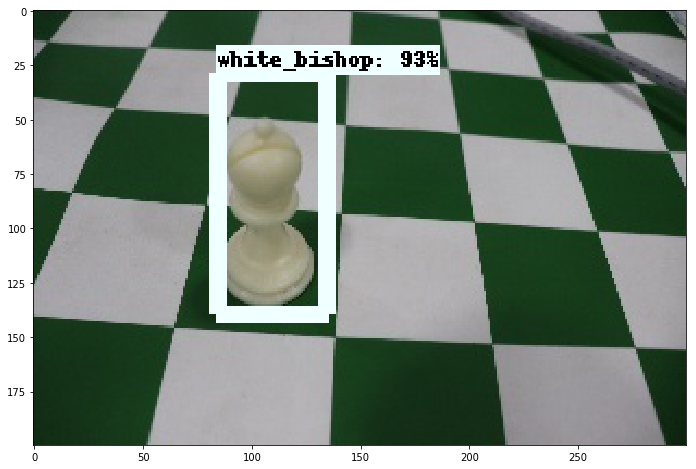

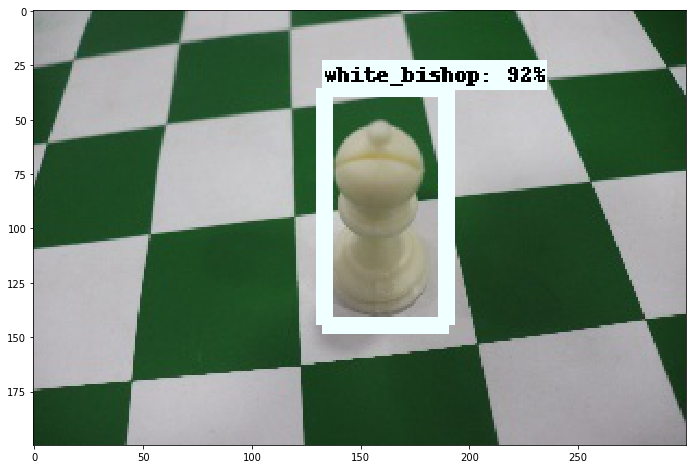

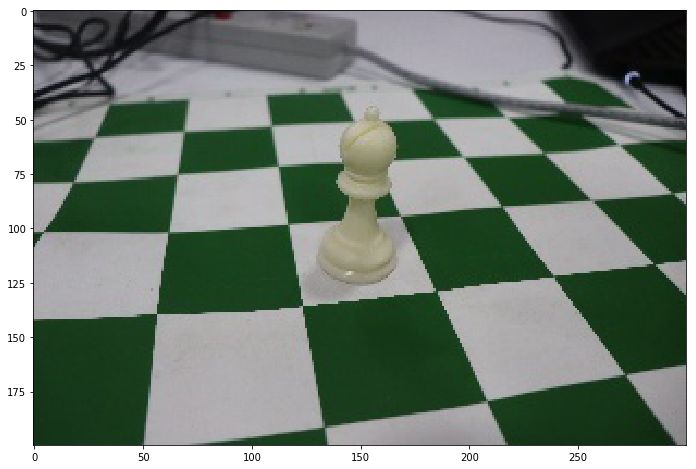

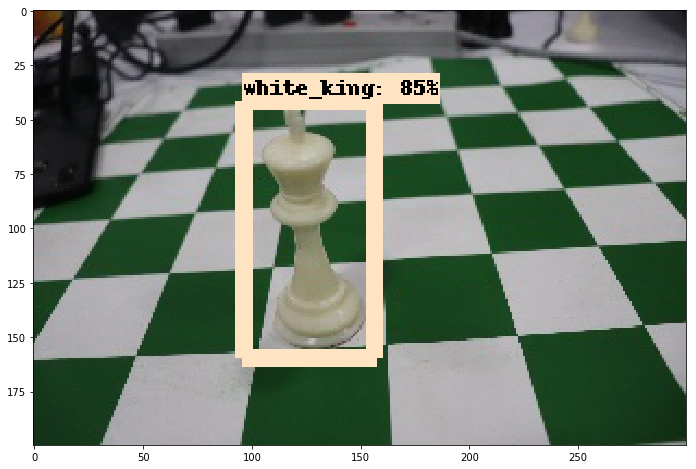

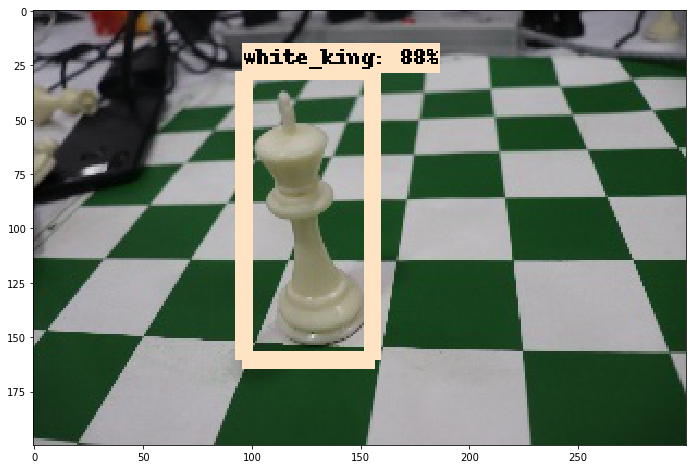

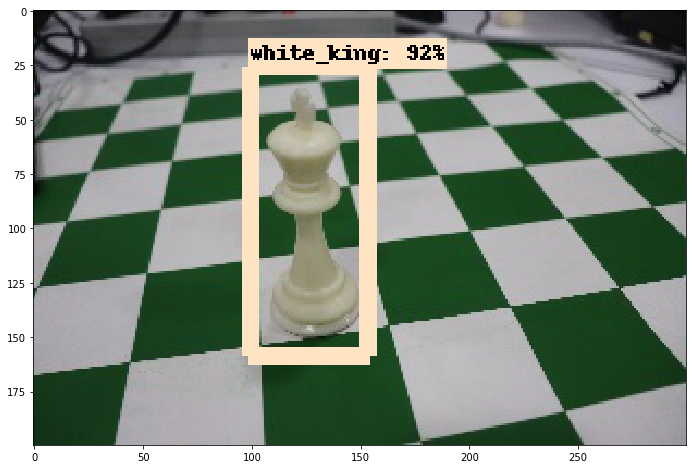

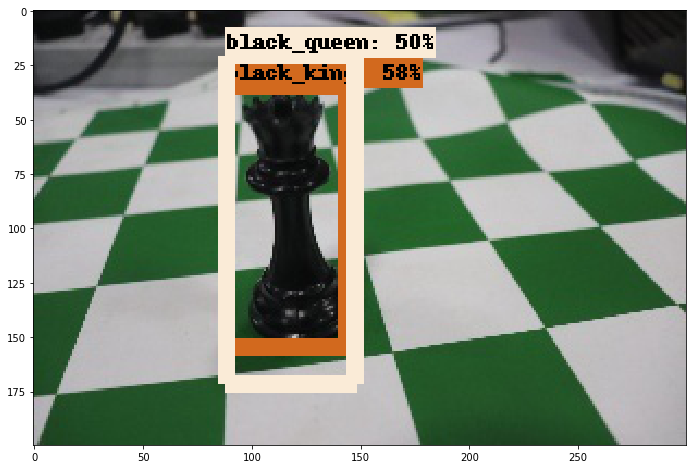

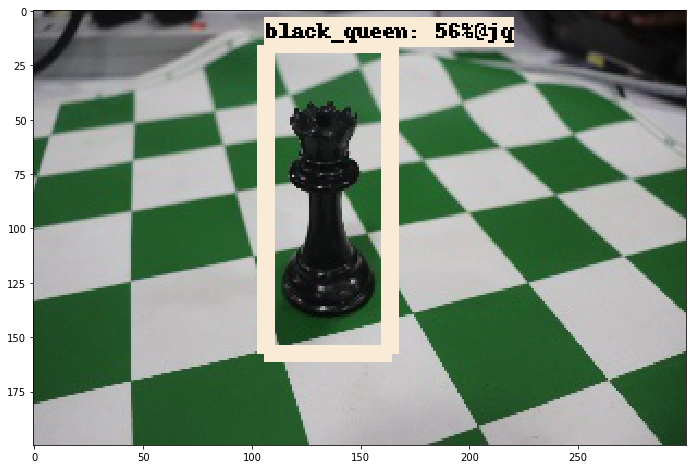

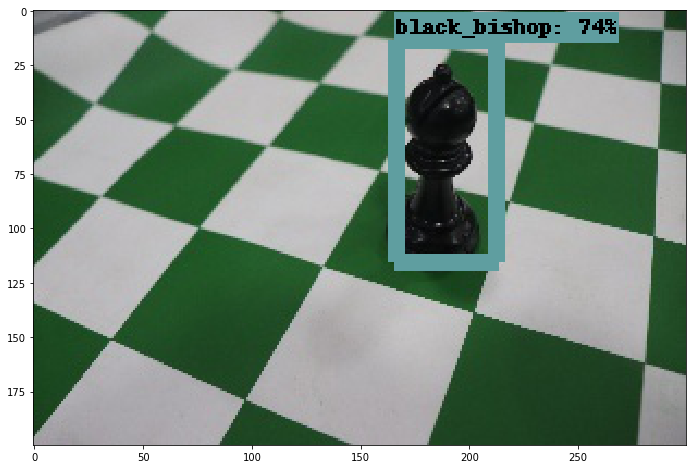

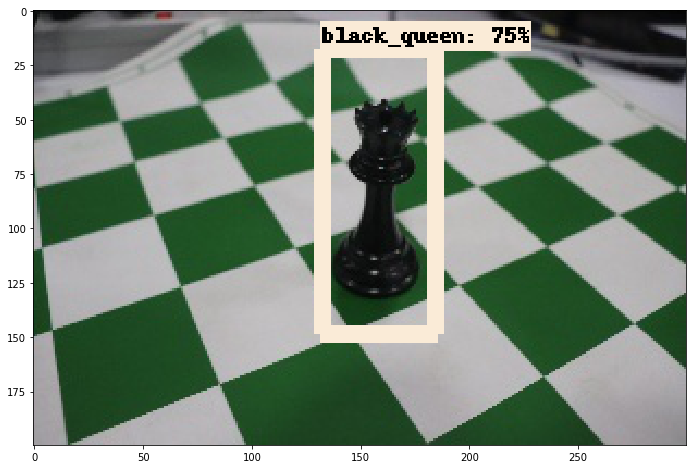

In [76]:
%cd ~/models/research/object_detection
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ > '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
  

  
  
# This is needed to display the images.
%matplotlib inline




from utils import label_map_util

from utils import visualization_utils as vis_util




# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/fine_tuned_model/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/chess/label_map.pbtxt'

NUM_CLASSES = 12




detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
    
    
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



from glob import glob
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

TEST_IMAGE_PATHS = glob('/content/drive/My Drive/modified_data/test/images/*.JPG')
print(TEST_IMAGE_PATHS)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict




for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  